In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Embedding, BatchNormalization, Flatten, SimpleRNN, LSTM, GRU, concatenate
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential, Model
from keras import Input
from tensorflow.keras.utils import plot_model

In [2]:
from keras.datasets import reuters

In [3]:
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=10000) 

In [4]:
X_train = pad_sequences(X_train,100)
X_test = pad_sequences(X_test,100)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
input_shape= X_train.shape[1]
output_shape = y_train.shape[1]

In [6]:
model = Sequential()
model.add(Embedding(10001,128,input_length=input_shape))
model.add(Conv1D(32,7,activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

In [7]:
opt = 'rmsprop'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=opt, loss = loss, metrics = metrics)

In [8]:
epochs= 30
batch_size = 32
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size)

Epoch 1/30
281/281 [==============================] - 6s 20ms/step - loss: 1.7332 - accuracy: 0.5537
Epoch 2/30
281/281 [==============================] - 6s 20ms/step - loss: 1.1992 - accuracy: 0.7024
Epoch 3/30
281/281 [==============================] - 5s 20ms/step - loss: 0.9159 - accuracy: 0.7700
Epoch 4/30
281/281 [==============================] - 5s 19ms/step - loss: 0.6772 - accuracy: 0.8322
Epoch 5/30
169/281 [=================>............] - ETA: 2s - loss: 0.4718 - accuracy: 0.8805

KeyboardInterrupt: 

In [ ]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 0s 2ms/step - loss: 3.2544 - accuracy: 0.6607


[3.2543909549713135, 0.6607301831245422]

In [ ]:
model = Sequential()
model.add(Embedding(1000,64,input_length=100))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
encoded_question.shape

TensorShape([None, 32])

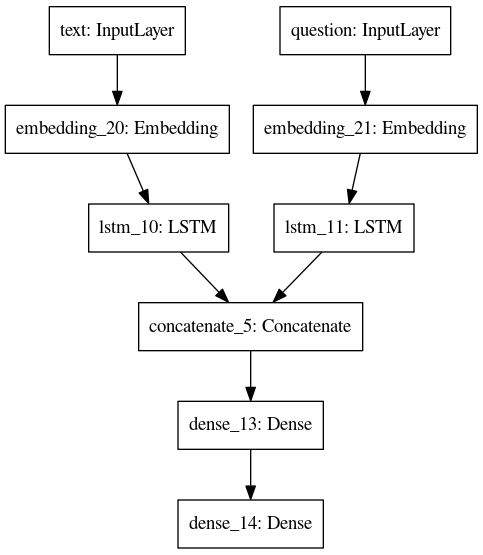

In [ ]:
text_vocab_size = 10000
question_vocab_size = 10000
answer_vocab_size = 500

text_input = Input(shape=(None,),name="text")
question_input = Input(shape=(None,),name="question")
embedded_text = Embedding(text_vocab_size,64)(text_input)
embedded_question = Embedding(question_vocab_size,32)(question_input)
encoded_text = LSTM(32)(embedded_text)
encoded_question = LSTM(32)(embedded_question)

concated = concatenate([encoded_text,encoded_question],axis=-1)

answer = Dense(500,activation='relu')(concated)
output = Dense(answer_vocab_size,activation="softmax")(answer)


model = Model(inputs=[text_input,question_input],outputs=output)

plot_model(model)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

In [ ]:
from keras.layers import Dense
from keras.models import Model
from keras import Input

In [ ]:
input_data1 = Input(shape=(X_train.shape[1],))
layer1 = Dense(64,activation='relu')(input_data)
layer2 = Dense(64,activation='relu')(layer1)
output = Dense(1)(layer2)
model = Model(inputs=[input_data],outputs=output)

In [ ]:
optimizer='rmsprop'
loss = 'mse'
metrics = ['mae']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [ ]:
epochs= 500
batch_size = 100
model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size)

2022-05-09 16:48:52.248249: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 552.3240 - mae: 18.0243
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 184.6674 - mae: 10.3872
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 67.9171 - mae: 5.9655
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 64.2993 - mae: 5.6267
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 82.9551 - mae: 6.6191
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 162.3967 - mae: 9.6968
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 111.7823 - mae: 8.2972
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 76.9702 - mae: 6.5822
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 142.3041 - mae: 9.7298
Epoch 10/500
5/5 [==============================] - 0s 1ms/step - loss: 65.4086 - mae: 5.7120
Epoch 11/500
5/5 [==============================] - 0s 1ms/ste

In [ ]:
sst = np.sum(np.square(y_test - np.mean(y_test)))
sse = np.sum(np.square(y_test - model.predict(X_test)))
sse/sst

305.72495067449375

In [ ]:
np.sum(np.square(y_test - model.predict(X_test)))

2595871.591232433

In [ ]:
ref_text = Input(shape=(None,),name='ref')
qst_text = Input(shape=(None,),name='qst')
ref_embedding = Embedding(1000,64)(ref_text)
qst_embedding = Embedding(1000,64)(qst_text)
ref_lstm = LSTM(10)(ref_embedding)
qst_lstm = LSTM(10)(qst_embedding)
concat_layer = concatenate([ref_lstm,qst_lstm],axis=-1)
flatten_layer = Flatten()(concat_layer)
output = Dense(10,activation='softmax')(flatten)
model1 = Model(inputs=[ref_text,qst_text],outputs=[output])

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name='ref'), name='ref', description="created by layer 'ref'") at layer "embedding_9". The following previous layers were accessed without issue: []

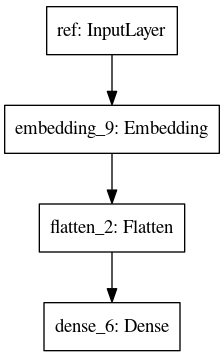

In [ ]:
plot_model(model1)

In [ ]:
ref_text = Input(shape=(None,),name='ref')
question_text = Input(shape=(None,),name='question')
ref_embedding = Embedding(1000,64)(ref_text)
qeustion_embedding = Embedding(1000,64)(question_text)

In [ ]:
model = Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(100,)))
model.add(Dense(100,activation='softmax'))

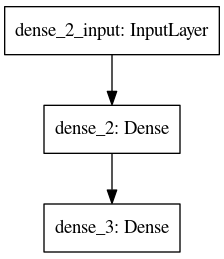

In [ ]:
plot_model(model)

In [ ]:
from keras.datasets import reuters

In [ ]:
(X_train,y_train),(X_test,y_test) = reuters.load_data()

In [ ]:
if pd.Series(X_test).apply(len).max() > pd.Series(X_test).apply(len).max():
    maxlen = pd.Series(X_test).apply(len).max()+1
else:
    maxlen = pd.Series(X_train).apply(len).max()+1

In [ ]:
X_train = pad_sequences(X_train,maxlen=maxlen,padding='post')
X_test = pad_sequences(X_test,maxlen=maxlen,padding='post')

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
ouput_shape = y_train.shape[1]

In [ ]:
maxlen = 100

In [ ]:
max_val = 0
for i in X_train:
    if max(i) > max_val:
        max_val = max(i)   

In [ ]:
max_val += 1

In [ ]:
max_val

30971

In [ ]:
model = Sequential()
model.add(Embedding(max_val, 8, input_length=maxlen))
model.add(GRU(maxlen,return_sequences=True))
model.add(GRU(10,return_sequences=True))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(ouput_shape,activation="softmax"))

In [ ]:
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [ ]:
epochs = 10
batch_size = 32
model.fit(X_train, 
          y_train,
         epochs=epochs,
         batch_size=batch_size)

Epoch 1/10
281/281 [==============================] - 23s 72ms/step - loss: 1.9553 - accuracy: 0.4906
Epoch 2/10
281/281 [==============================] - 20s 69ms/step - loss: 1.4085 - accuracy: 0.6281
Epoch 3/10
281/281 [==============================] - 19s 67ms/step - loss: 1.0987 - accuracy: 0.7064
Epoch 4/10
281/281 [==============================] - 18s 65ms/step - loss: 0.8701 - accuracy: 0.7637
Epoch 5/10
281/281 [==============================] - 18s 62ms/step - loss: 0.6715 - accuracy: 0.8135
Epoch 6/10
281/281 [==============================] - 19s 68ms/step - loss: 0.4939 - accuracy: 0.8641
Epoch 7/10
281/281 [==============================] - 19s 67ms/step - loss: 0.3498 - accuracy: 0.9063
Epoch 8/10
281/281 [==============================] - 19s 67ms/step - loss: 0.2738 - accuracy: 0.9281
Epoch 9/10
281/281 [==============================] - 19s 67ms/step - loss: 0.2211 - accuracy: 0.9421
Epoch 10/10
281/281 [==============================] - 19s 67ms/step - loss: 0.201

In [ ]:
model.evaluate(X_test,y_test)

71/71 [==============================] - 2s 15ms/step - loss: 2.3095 - accuracy: 0.6224


[2.309532403945923, 0.6224399209022522]

In [ ]:
# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 + 1입니다)와 임베딩 차원(여기서는 64)입니다
length = pd.Series(X_train).apply(len).max()+1

embedding_layer = Embedding(length, 64)

In [ ]:
pd.Series(X_train).apply(len).max()

2376